**Algunos hotkeys útiles en jupyter:**

* **control+enter**: correr celda.
* **enter**: editar celda.
* **escape**: salir del modo edición.
* **control+s**: guardar notebook.

**Fuera del modo edición se pueden utilizar los siguientes hotkeys:**
* **a**: agregar celda arriba.
* **b**: agregar celda abajo.
* **x**: borrar celda.
* **z**: deshacer borrar celda.
* **y**: setear celda en modo python (código).
* **m**: setear celda en modo markdown (texto).
* **o**: mostrar/ocultar resultado.

**Líbrerias:**

* **Jupyter notebook**: Entorno de trabajo [(cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Jupyter_Notebook_Cheat_Sheet.pdf)
* **Numpy**: librería de funciones matemáticas de alto nivel para operar con vectores y matrices [(cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* **Pandas**: librería destinada al análisis de datos, permiten trabajar con datos estructurados de forma muy eficiente [(cheat sheet)](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* **Matplotlib**: librería para la generación de gráficos [(cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from ipywidgets import FloatSlider, interact
from tqdm import tqdm_notebook, tnrange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Generamos data

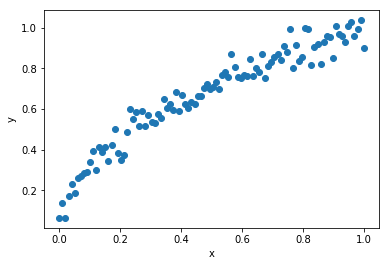

In [2]:
np.random.seed(10)

n = 100 # Nro de datos
x = np.linspace(0, 1, n)
y = x**0.5 + np.random.normal(0, 0.05, n)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

# Definimos el modelo

$ f(x_i) = ax_i + b $

In [3]:
a = 1
b = 0

def f(x): return a*x + b

y_ = f(x)

In [4]:
y[:10]

array([0.06657933, 0.13626773, 0.0648638 , 0.17365846, 0.23207436,
       0.18872901, 0.25945856, 0.27133544, 0.28448219, 0.29278133])

In [5]:
y_[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

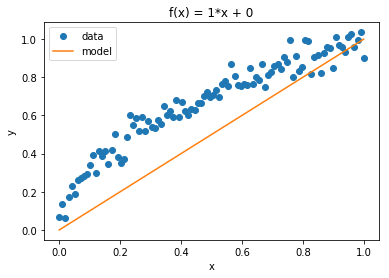

In [6]:
def plot(title=''):
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_, label='model')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
plot(f'f(x) = {a}*x + {b}')

# Función de pérdida

$ L = \frac{1}{2m}\sum\limits_{i=1}^m (f(x_i) - y_i)^2 $

In [7]:
def L(y, y_): return ((y_ - y)**2).mean() / 2

loss = L(y, y_)
loss

0.01857300630707608

In [8]:
slider_a = FloatSlider(value=0, min=-2.5, max=2.5, step=0.1, description='slope (a)')
slider_b = FloatSlider(value=0.5, min=0, max=1, step=0.1, description='intercept (b)')

trace_data = go.Scatter(x=x, y=y, mode='markers', name='data')
trace_model = go.Scatter(x=x, y=y_, name='model')
fig = go.FigureWidget(data=[trace_data, trace_model], layout={'width': 500, 'height':400})

def anim(a, b):
    y_ = a*x + b
    fig.layout.title = f'Loss = {L(y, y_):.4}'
    with fig.batch_animate(duration=100):
        fig.data[1].y = y_
    
interact(anim, a=slider_a, b=slider_b)
fig

interactive(children=(FloatSlider(value=0.0, description='slope (a)', max=2.5, min=-2.5), FloatSlider(value=0.…

FigureWidget({
    'data': [{'mode': 'markers',
              'name': 'data',
              'type': 'scatter',…

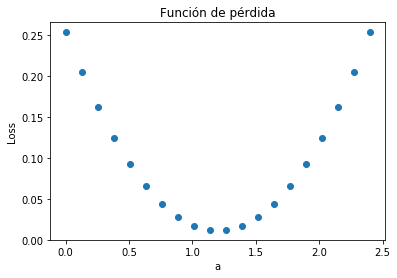

In [9]:
# Veamos la función de pérdida en distintos puntos de a, teniendo b=0
test_a = np.linspace(0, 2.4, 20)
losses = [L(y, single_a*x + b) for single_a in test_a]

plt.plot(test_a, losses, 'o')
plt.title('Función de pérdida')
plt.xlabel('a')
plt.ylabel('Loss')
plt.show()

# Optimización

## Gradients

$ \frac{dL}{da} = \sum\limits_{i=1}^m (f(x_i) - y_i)(x_i)$

$ \frac{dL}{db} = \sum\limits_{i=1}^m (f(x_i) - y_i)$

In [10]:
def gradients(x, y, y_):
    da = ((y_ - y) * x).mean()
    db = (y_ - y).mean()
    return da, db

gradients(x, y, y_)

(-0.06688629743731625, -0.16876610837831105)

## Gradient descent

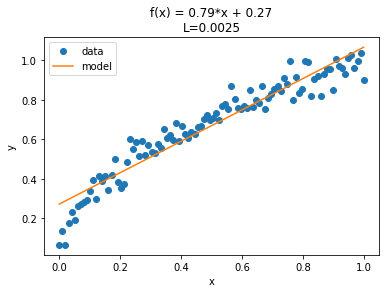

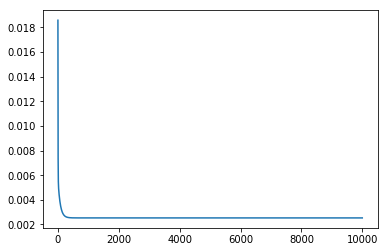

In [11]:
# initial params

a = 1
b = 0
lr = 0.1
steps = 10_000
losses = []

for i in tnrange(steps):
    y_ = f(x)
    loss = L(y, y_)
    losses.append(loss)
    da, db = gradients(x, y, y_)
    a -= da*lr
    b -= db*lr
    
plot(f'f(x) = {a:.2}*x + {b:.2}\nL={loss:.2}')
plt.plot(losses);

# Ejercicio 1: Casas Simple

In [15]:
df = pd.read_table('data/CasasSimple.txt', names=['metros_cuadrados', 'precio'])
print(df.shape)
df.head()

(58, 2)


,metros_cuadrados,precio
0,132.3,319000.0
1,141.5,389000.0
2,71.2,199000.0
3,277.4,599000.0
4,338.7,750000.0


Es importante tener en cuenta lo que estamos evaluando, en el caso de precios es bastante común tener mayor interes en el ratio del error que en el valor del error.

Ej, ¿Qué error es más grave?:

* ¿Un error de S/.10 en la predicción ó un error de 10% en la predicción?
* ¿Un error de S/.100 en un precio de S/.1,000,000 ó un error de S/.100 en un precio de S/.1000?

Por eso vamos a considerar el **log** del precio.

In [16]:
# Separamos las variables dependientes e independientes
x = df['metros_cuadrados'].values
y = np.log(df['precio'].values)

In [17]:
# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_val.shape

((38,), (20,))

In [18]:
# Normalizamos la data
x_mean = x_train.mean()
x_std = x_train.std()
x_train = (x_train - x_mean) / x_std

# Aplicamos la misma normalizacion al conjunto de validacion
x_val = (x_val - x_mean) / x_std

In [19]:
# Algunas funciones para graficar
def plot_train_val(title=''):
    y_train_ = f(x_train)
    y_val_ = f(x_val)
    fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))
    ax1.plot(x_train, y_train, 'o', label='data')
    ax1.plot(x_train, y_train_, label='model')
    ax1.set_title(f'Train (L={L(y_train, y_train_):.4f})')
    ax1.legend()
    ax2.plot(x_val, y_val, 'o', label='data')
    ax2.plot(x_val, y_val_, label='model')
    ax2.set_title(f'Validation (L={L(y_val, y_val_):.4f})')
    plt.tight_layout()
    plt.show()
    
def plot_losses():
    plt.plot(losses_train, label='train')
    plt.plot(losses_val, label='validation')
    plt.legend()
    plt.show()

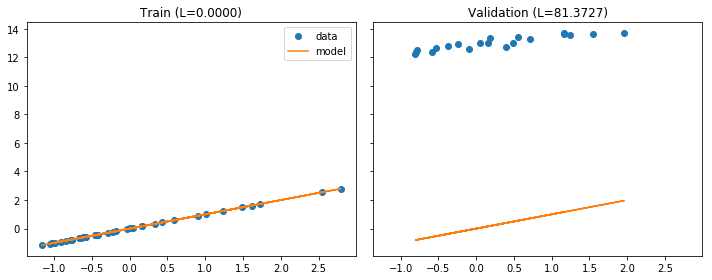

In [20]:
# Definimos el modelo
a = 1
b = 0
def f(x): return a*x + b

y_train = f(x_train)
y_train_ = f(x_val)
   
plot_train_val()

In [ ]:
# initial params
a = 1
b = 0
lr = 0.01
steps = 10_000
losses_train = []
losses_val = []

# Gradient descent
for i in tnrange(steps):
    # COMPLETAR
    
    # Guardamos las perdidas
    loss_train = L(y_train, y_)
    loss_val = L(y_val, f(x_val))
    losses_train.append(loss_train)
    losses_val.append(loss_val)
    
print(f'f(x) = {a:.2f}*x + {b:.2f}')
plot_train_val()
plot_losses()

# Multiple linear regression

$ f(x_{1i}, x_{2i}) = ax_{1i} + bx_{2i} + c $

In [ ]:
np.random.seed(10)

n = 100

x1 = np.random.normal(size=n) + np.random.normal(0, 0.5, n)
x2 = np.random.normal(size=n) + np.random.normal(0, 0.5, n)
y = x1 + x2*2 + np.random.normal(1, 1, n)

In [ ]:
a = 1.0
b = 1.0
c = 0.0

def f(x1,x2): return a*x1 + b*x2 + c

y_ = f(x1,x2)

In [ ]:
def plot3d(title=''):
    trace = go.Scatter3d(
        x=x1, y=x2, z=y,
        mode='markers',
        marker={'size':2, 'opacity':0.8}
    )

    mesh_x1 = [-4,-4,4,4]
    mesh_x2 = [-4,4,-4,4]
    mesh_y = [f(x1,x2) for x1,x2 in zip(mesh_x1,mesh_x2)]

    mesh = go.Mesh3d(x=mesh_x1, y=mesh_x2, z=mesh_y, opacity=0.5)

    layout = go.Layout({
        'title': title,
        'scene':{
            'xaxis':{'title':'x1'},
            'yaxis':{'title':'x2'},
            'zaxis':{'title':'y'}
        }
    })

    fig = go.FigureWidget(data=[trace, mesh], layout=layout)
    
    return fig

loss = L(y, y_)
plot3d(f'f(x) = {a:.2}(x1) + {b:.2}(x2) + {c:.2}<br>L={loss:.2}')

$ \hat{y} = f(x_{1i}, x_{2i}) = ax_{1i} + bx_{2i} + c $

$ L = \frac{1}{2m}\sum\limits_{i=1}^m (\hat{y} - y_i)^2 $

$ \frac{dL}{da} = \sum\limits_{i=1}^m (\hat{y} - y_i)(x_{1i})$

$ \frac{dL}{db} = \sum\limits_{i=1}^m (\hat{y} - y_i)(x_{2i})$

$ \frac{dL}{dc} = \sum\limits_{i=1}^m (\hat{y} - y_i)$

In [ ]:
def gradients_mult(x1, x2, y, y_):
    da = ((y_ - y) * x1).mean()
    db = ((y_ - y) * x2).mean()
    dc = (y_ - y).mean()

    return da, db, dc

gradients_mult(x1, x2, y, y_)

In [ ]:
# initial params
a = 1
b = 1
c = 0
lr = 0.1
steps = 10_000
losses = []

for i in tnrange(steps):
    y_ = f(x1, x2)
    loss = L(y, y_)
    losses.append(loss)
    da, db, dc = gradients_mult(x1, x2, y, y_)
    a -= da*lr
    b -= db*lr
    c -= dc*lr
    
loss = L(y, y_)
display(plot3d(f'f(x) = {a:.2}(x1) + {b:.2}(x2) + {c:.2}<br>L={loss:.2}'))
plt.plot(losses);

# Ejercicio 2: Casas Multi

In [ ]:
df = pd.read_table('data/CasasMulti.txt', names=['m2_construidos', 'num_cuartos', 'num_banos', 'm2_habitables', 'precio'])
print(df.shape)
df.head()

In [ ]:
# Separamos las variables dependientes e independientes
x = df.drop('precio', axis=1)
y = np.log(df['precio'].values)

# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_val.shape

In [ ]:
# Usamos el metodo StandardScaler para normalizar todas las variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Aplicamos el scaler al conjunto de validación
x_val = scaler.transform(x_val)

In [ ]:
# Separamos las variables
x1_train, x1_val = x_train[:, 0], x_val[:, 0]
x2_train, x2_val = x_train[:, 1], x_val[:, 1]
x3_train, x3_val = x_train[:, 2], x_val[:, 2]
x4_train, x4_val = x_train[:, 3], x_val[:, 3]

$ f(x_{1i}, x_{2i}) = ax_{1i} + bx_{2i} + cx_{3i} + dx_{4i} + e $

In [ ]:
# Definimos el modelo
# COMPLETAR

y_train_ = f(x1_train, x2_train, x3_train, x4_train)
y_val_ = f(x1_val, x2_val, x3_val, x4_val)

print(f'Train loss      = {L(y_train, y_train_):.4f}')
print(f'Validation loss = {L(y_val, y_val_):.4f}')

In [ ]:
def gradients_mult(x1, x2, x3, x4, y, y_):
    # COMPLETAR

    return da, db, dc, dd, de

gradients_mult(x1_train, x2_train, x3_train, x4_train, y_train, y_train_)

In [ ]:
# initial params
# COMPLETAR

# gradient descent
# COMPLETAR
    
print(f'f(x) = {a:.2f}*x1 + {b:.2f}*x2 + {c:.2f}*x3 + {d:.2f}*x4 + {e:.2f}')
print(f'Train loss      = {loss_train:.4f}')
print(f'Validation loss = {loss_val:.4f}')
plot_losses()

# Usando matrices

http://matrixmultiplication.xyz/
![](imgs/mm.png)

In [ ]:
# Usamos la misma data del ejercicio 2
df = pd.read_table('data/CasasMulti.txt', names=['m2_construidos', 'num_cuartos', 'num_banos', 'm2_habitables', 'precio'])

# Separamos las variables dependientes e independientes
x = df.drop('precio', axis=1)
y = np.log(df['precio'].values)

# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

# Usamos el metodo StandardScaler para normalizar todas las variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Aplicamos el scaler al conjunto de validación
x_val = scaler.transform(x_val)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
# Creamos una matriz de pesos y un valor para el bias
w = np.ones([x.shape[1], 1])
b = 0

w.shape

In [ ]:
# Definimos el modelo
def f(x): return x@w + b

y_train_ = f(x_train)
y_train_.shape, y_train.shape

In [ ]:
# Usamos la funcion ravel() para que el resultado tenga solo 1 dimension
def f(x): return (x@w + b).ravel()

y_train_ = f(x_train)
y_train_.shape, y_train.shape

In [ ]:
y_val_ = f(x_val)
print(f'Train loss      = {L(y_train, y_train_):.4f}')
print(f'Validation loss = {L(y_val, y_val_):.4f}')

In [ ]:
def gradients_matrices(x, y, y_):
    dw = (x.T @ (y_ - y)) / len(x)
    db = (y_ - y).mean()
    return dw[:,None], db

gradients_matrices(x_train, y_train, y_train_)

In [ ]:
# initial params
w = np.ones([x.shape[1], 1])
b = 0
lr = 0.1
steps = 10_000
losses_train = []
losses_val = []

for i in tnrange(steps):
    y_ = f(x_train)
    
    loss_train = L(y_train, y_)
    loss_val = L(y_val, f(x_val))
    losses_train.append(loss_train)
    losses_val.append(loss_val)
    
    dw, db = gradients_matrices(x_train, y_train, y_)
    w -= dw*lr
    b -= db*lr
    
print(f'w = {w.ravel().round(2)}')
print(f'b = {b:.2f}')
print(f'Train loss      = {loss_train:.4f}')
print(f'Validation loss = {loss_val:.4f}')
plot_losses()

In [ ]:
n = 15
results = pd.DataFrame({'real': y_val, 'pred': f(x_val)})
results['error'] = results['pred'] - results['real']
results.head(n).round(4).T

# Ejercicio 3: Diabetes Dataset

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [ ]:
data.keys()

In [ ]:
print(data['DESCR'])

In [ ]:
x = data['data']
y = data['target']
x.shape, y.shape

In [ ]:
# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_val.shape

In [ ]:
# COMPLETAR

In [ ]:
n = 15
results = pd.DataFrame({'real': y_val, 'pred': f(x_val)})
results['error'] = results['pred'] - results['real']
results.head(n).round(4).T